# Installing PyCaret and necessary libraries and loading the data

In [ ]:
# Install the PyCaret library
!pip install pycaret --quiet

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the traffic dataset and check the first 5 rows
from pycaret.datasets import get_data
dataset = get_data('traffic')
dataset.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,Rush Hour,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,1,5545
1,NaN,289.36,0.0,0.0,75,Clouds,0,4516
2,NaN,289.58,0.0,0.0,90,Clouds,0,4767
3,NaN,290.13,0.0,0.0,90,Clouds,0,5026
4,NaN,291.14,0.0,0.0,75,Clouds,0,4918


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,Rush Hour,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,1,5545
1,NaN,289.36,0.0,0.0,75,Clouds,0,4516
2,NaN,289.58,0.0,0.0,90,Clouds,0,4767
3,NaN,290.13,0.0,0.0,90,Clouds,0,5026
4,NaN,291.14,0.0,0.0,75,Clouds,0,4918


# Data exploration and pre-processing

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48204 non-null  float64
 2   rain_1h         48204 non-null  float64
 3   snow_1h         48204 non-null  float64
 4   clouds_all      48204 non-null  int64  
 5   weather_main    48204 non-null  object 
 6   Rush Hour       48204 non-null  int64  
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.9+ MB


In [ ]:
# Check the shape of data
dataset.shape

(48204, 8)

In [ ]:
# Check for duplicates
dataset.duplicated().sum()

244

In [ ]:
# Remove duplicates
dataset=dataset.drop_duplicates()
dataset.shape

(47960, 8)

In [ ]:
# Check for missing values per column
dataset.isnull().sum()

,0
holiday,47899
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
Rush Hour,0
traffic_volume,0


In [ ]:
# Check unique values of the holiday column
dataset['holiday'].unique()

array([nan, 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

In [ ]:
# Replace all non-null values in the holiday column with 1, else 0
dataset['holiday'] = dataset['holiday'].notnull().astype(int)

In [ ]:
# Verify the changes by checking the unique values in the holiday column and their counts
dataset['holiday'].value_counts()

,count
holiday,
0,47899
1,61


In [ ]:
# Rename columns
dataset = dataset.rename(columns={'holiday': 'is_holiday', 'Rush Hour': 'is_rush_hour'})

# Display the first 5 rows to verify the changes
dataset.head()


,is_holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,is_rush_hour,traffic_volume
0,0,288.28,0.0,0.0,40,Clouds,1,5545
1,0,289.36,0.0,0.0,75,Clouds,0,4516
2,0,289.58,0.0,0.0,90,Clouds,0,4767
3,0,290.13,0.0,0.0,90,Clouds,0,5026
4,0,291.14,0.0,0.0,75,Clouds,0,4918


In [ ]:
# Check the statistical distribution of data
dataset.describe()

,is_holiday,temp,rain_1h,snow_1h,clouds_all,is_rush_hour,traffic_volume
count,47960.000000,47960.000000,47960.000000,47960.000000,47960.000000,47960.000000,47960.000000
mean,0.001272,281.217598,0.335965,0.000224,49.187427,0.249833,3260.753023
std,0.035641,13.358199,44.902918,0.008188,39.006685,0.432921,1986.834356
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,272.150000,0.000000,0.000000,1.000000,0.000000,1195.000000
50%,0.000000,282.500000,0.000000,0.000000,64.000000,0.000000,3380.000000
75%,0.000000,291.840000,0.000000,0.000000,90.000000,0.000000,4933.250000
max,1.000000,310.070000,9831.300000,0.510000,100.000000,1.000000,7280.000000


In [ ]:
# Check the value counts of rain levels
dataset['rain_1h'].value_counts(normalize=True)

,proportion
rain_1h,
0.00,0.927711
0.25,0.019766
0.51,0.005338
1.02,0.002565
0.30,0.002523
...,...
1.28,0.000021
1.47,0.000021
4.66,0.000021


In [ ]:
# Check the frequency of snow levels
dataset['snow_1h'].value_counts(normalize=True)

,proportion
snow_1h,
0.00,0.998686
0.05,0.000292
0.06,0.000250
0.51,0.000125
0.25,0.000125
0.13,0.000125
0.10,0.000125
0.32,0.000104
0.17,0.000063


In [ ]:
# Convert rain_1h and snow_1h to binary: 1 if any value > 0, else 0 to simplify the model since > 90% of values are 0
dataset['rain_1h'] = (dataset['rain_1h'] > 0).astype(int)
dataset['snow_1h'] = (dataset['snow_1h'] > 0).astype(int)

In [ ]:
# Re-categorize weather conditions to 3 categories for simplicity

# Define a dictionary to categorize the weather conditions
weather_mapping = {
    'Clear': 'Normal',
    'Clouds': 'Normal',
    'Rain': 'Precipitation',
    'Drizzle': 'Precipitation',
    'Thunderstorm': 'Precipitation',
    'Snow': 'Precipitation',
    'Squall': 'Precipitation',
    'Mist': 'Low_Visibility',
    'Haze': 'Low_Visibility',
    'Fog': 'Low_Visibility',
    'Smoke': 'Low_Visibility'
}

# Apply the mapping to the 'weather_main' column
dataset['weather_category'] = dataset['weather_main'].map(weather_mapping)

# Check the new categories
print(dataset[['weather_main', 'weather_category']].tail(50))

       weather_main weather_category
48153          Rain    Precipitation
48154         Clear           Normal
48155         Clear           Normal
48156         Clear           Normal
48157         Clear           Normal
48158         Clear           Normal
48159         Clear           Normal
48160         Clear           Normal
48161        Clouds           Normal
48162        Clouds           Normal
48163         Clear           Normal
48164       Drizzle    Precipitation
48165          Rain    Precipitation
48166        Clouds           Normal
48167        Clouds           Normal
48168        Clouds           Normal
48169       Drizzle    Precipitation
48170        Clouds           Normal
48171        Clouds           Normal
48172        Clouds           Normal
48174        Clouds           Normal
48175        Clouds           Normal
48176        Clouds           Normal
48177        Clouds           Normal
48178        Clouds           Normal
48179        Clouds           Normal
4

In [ ]:
# Check lowest values of the target
dataset['traffic_volume'].value_counts().sort_index().head(50)

,count
traffic_volume,
0,2
1,7
2,7
3,9
5,6
6,2
7,6
8,2
9,1


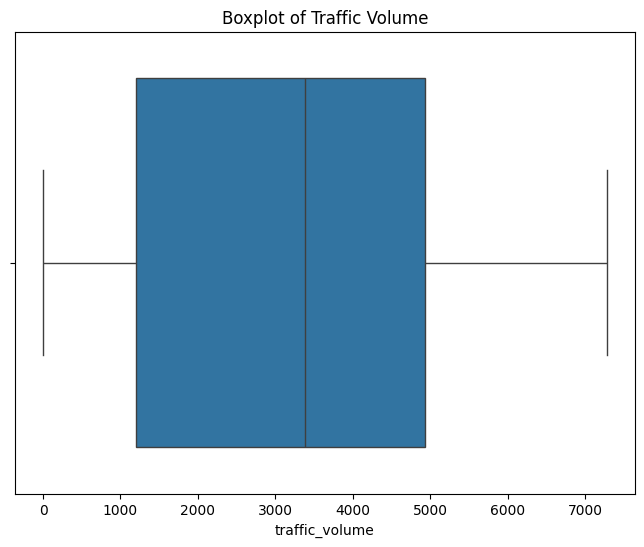

In [ ]:
# Plot the distribution of traffic_volume

plt.figure(figsize=(8, 6))
sns.boxplot(x=dataset['traffic_volume'])
plt.title('Boxplot of Traffic Volume')
plt.show()


In [ ]:
# Create a copy of the dataset
data1=dataset.copy()

In [ ]:
# Count rows where traffic_volume is less than or equal to 1000
len(data1[data1['traffic_volume'] <= 1000])


10931

In [ ]:
# Define bins and bin labels for traffic volume
bins = [0, 1000, 3000, 5000, 7500]
labels = ['0–1000 (Low)', '1001–3000 (Moderate)', '3001–5000 (Busy)', '5001+ (Very Busy)']

# Bin the traffic volume
data1['traffic_volume_bin'] = pd.cut(data1['traffic_volume'], bins=bins, labels=labels, right=True, include_lowest=True)

# Calculate distribution
distribution = data1['traffic_volume_bin'].value_counts().sort_index()

distribution1 = data1['traffic_volume_bin'].value_counts(normalize=True).sort_index() * 100

# Display the result
distribution_df = pd.DataFrame({
    'Traffic Volume Range': distribution.index,
    'Count' : distribution.values,
    'Percentage of Hours (%)': distribution1.values
})

(distribution_df)

,Traffic Volume Range,Count,Percentage of Hours (%)
0,0–1000 (Low),10931,22.791910
1,1001–3000 (Moderate),10478,21.847373
2,3001–5000 (Busy),15258,31.814012
3,5001+ (Very Busy),11293,23.546706


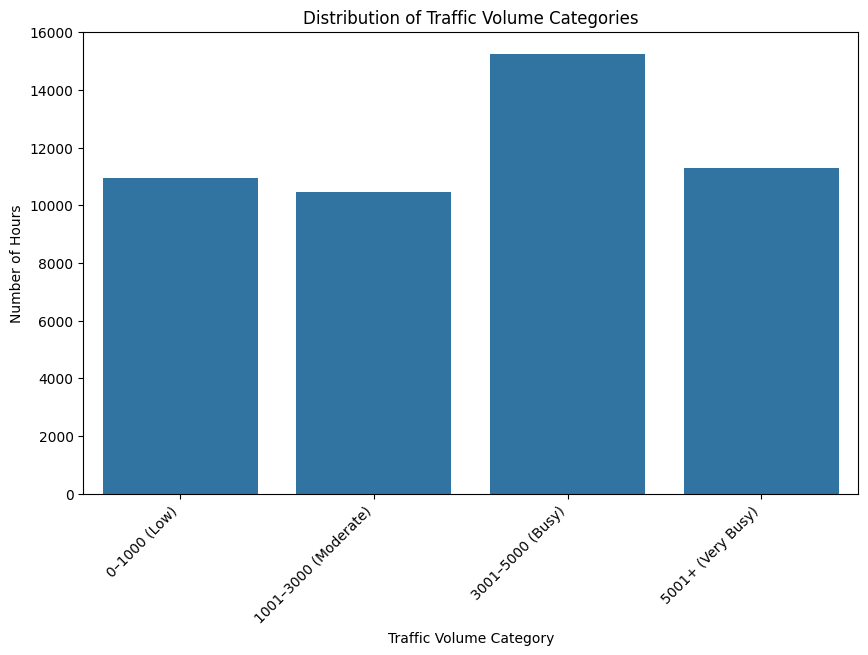

In [ ]:
# Plot counts of binned traffic volume

plt.figure(figsize=(10, 6))
sns.countplot(x='traffic_volume_bin', data=data1)
plt.title('Distribution of Traffic Volume Categories')
plt.xlabel('Traffic Volume Category')
plt.ylabel('Number of Hours')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
# Filter the dataset to exclude observations where traffic volume <= 1000
filtered_data = dataset[dataset['traffic_volume'] > 1000].copy()

# Print the shape to show the changes
print(f"Original data size: {dataset.shape}")
print(f"Filtered data size: {filtered_data.shape}")

Original data size: (47960, 9)
Filtered data size: (37029, 9)


In [ ]:
# Check info
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37029 entries, 0 to 48202
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   is_holiday        37029 non-null  int64  
 1   temp              37029 non-null  float64
 2   rain_1h           37029 non-null  int64  
 3   snow_1h           37029 non-null  int64  
 4   clouds_all        37029 non-null  int64  
 5   weather_main      37029 non-null  object 
 6   is_rush_hour      37029 non-null  int64  
 7   traffic_volume    37029 non-null  int64  
 8   weather_category  37029 non-null  object 
dtypes: float64(1), int64(6), object(2)
memory usage: 2.8+ MB


In [ ]:
# Check the updated descriptive statistics of the filtered dataset
filtered_data.describe()

,is_holiday,temp,rain_1h,snow_1h,clouds_all,is_rush_hour,traffic_volume
count,37029.000000,37029.000000,37029.000000,37029.000000,37029.000000,37029.000000,37029.000000
mean,0.000486,281.920184,0.071403,0.001242,50.598126,0.321100,4064.212671
std,0.022043,13.110595,0.257501,0.035224,38.433184,0.466905,1505.077527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1001.000000
25%,0.000000,272.610000,0.000000,0.000000,1.000000,0.000000,2859.000000
50%,0.000000,283.430000,0.000000,0.000000,64.000000,0.000000,4335.000000
75%,0.000000,292.750000,0.000000,0.000000,90.000000,1.000000,5220.000000
max,1.000000,310.070000,1.000000,1.000000,100.000000,1.000000,7280.000000


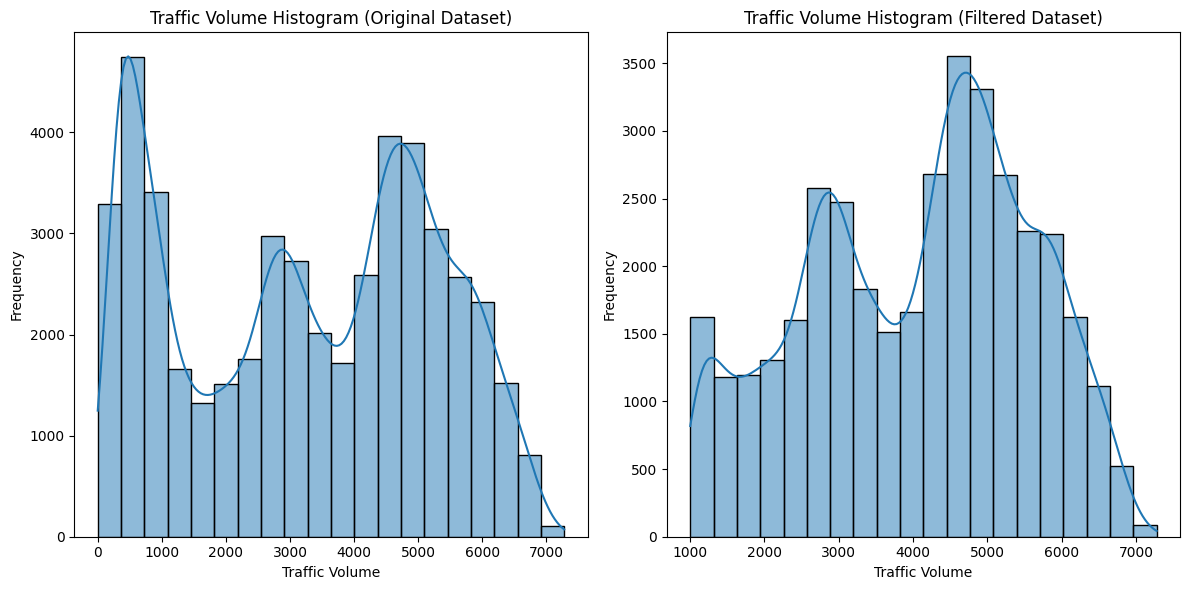

In [ ]:
# Plot histogram of the original dataset and filtered dataset to visualize changes in the distribution

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(dataset['traffic_volume'], bins=20, kde=True)
plt.title('Traffic Volume Histogram (Original Dataset)')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(filtered_data['traffic_volume'], bins= 20, kde=True)
plt.title('Traffic Volume Histogram (Filtered Dataset)')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Sampling 5% of data as unseen data

In [ ]:
# Sample 5% of data as unseen data
data = filtered_data.sample(frac=0.95, random_state=42 )
data_unseen = filtered_data.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

# Setting up the environment in PyCaret

In [ ]:
# Initialize setup
from pycaret.regression import *
setup(data = filtered_data,
          target = 'traffic_volume',
          categorical_features=['is_holiday', 'is_rush_hour', 'rain_1h', 'snow_1h'],
          numeric_features=['temp', 'clouds_all'],
          ordinal_features={'weather_category' : ['Normal', 'Low_Visibility', 'Precipitation']},
          ignore_features=['weather_main'],
          remove_outliers=True,
          remove_multicollinearity=True,
          normalize=True,
          normalize_method='minmax',
          session_id = 123)

,Description,Value
0,Session id,123
1,Target,traffic_volume
2,Target type,Regression
3,Original data shape,"(37029, 9)"
4,Transformed data shape,"(35733, 8)"
5,Transformed train set shape,"(24624, 8)"
6,Transformed test set shape,"(11109, 8)"
7,Ignore features,1
8,Ordinal features,1
9,Numeric features,2


In [ ]:
# Display the variables created during setup
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [ ]:
# View the transformed dataset after setup
get_config('dataset_transformed').head(10)

,is_holiday,temp,rain_1h,snow_1h,clouds_all,is_rush_hour,weather_category,traffic_volume
32640,0.0,283.410004,0.0,0.0,90.0,0.0,1.0,5400
46437,0.0,297.679993,0.0,0.0,40.0,0.0,0.0,2962
20795,0.0,268.410004,0.0,0.0,90.0,0.0,1.0,1313
23343,0.0,274.910004,0.0,0.0,20.0,1.0,0.0,2748
6721,0.0,285.380005,1.0,0.0,88.0,0.0,1.0,5791
33153,0.0,281.950012,0.0,0.0,75.0,0.0,0.0,6495
29610,0.0,265.619995,0.0,0.0,90.0,1.0,0.0,4116
5283,0.0,273.470001,0.0,0.0,90.0,0.0,2.0,4614
19245,0.0,284.149994,0.0,0.0,40.0,1.0,0.0,5934
43456,0.0,280.839996,0.0,0.0,1.0,0.0,0.0,5433


In [ ]:
# Show info of the transformed dataset
get_config('dataset_transformed').info()

<class 'pandas.core.frame.DataFrame'>
Index: 37029 entries, 32640 to 12155
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   is_holiday        37029 non-null  float64
 1   temp              37029 non-null  float32
 2   rain_1h           37029 non-null  float64
 3   snow_1h           37029 non-null  float64
 4   clouds_all        37029 non-null  float32
 5   is_rush_hour      37029 non-null  float64
 6   weather_category  37029 non-null  float64
 7   traffic_volume    37029 non-null  int32  
dtypes: float32(2), float64(5), int32(1)
memory usage: 2.1 MB


In [ ]:
# Display the descriptive statistics of the transformed dataset
get_config('dataset_transformed').describe()

,is_holiday,temp,rain_1h,snow_1h,clouds_all,is_rush_hour,weather_category,traffic_volume
count,37029.000000,37029.000000,37029.000000,37029.000000,37029.000000,37029.000000,37029.000000,37029.000000
mean,0.000486,281.920135,0.071403,0.001242,50.598125,0.321100,0.621891,4064.212671
std,0.022043,13.110599,0.257501,0.035224,38.432472,0.466905,0.836071,1505.077527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1001.000000
25%,0.000000,272.609985,0.000000,0.000000,1.000000,0.000000,0.000000,2859.000000
50%,0.000000,283.429993,0.000000,0.000000,64.000000,0.000000,0.000000,4335.000000
75%,0.000000,292.750000,0.000000,0.000000,90.000000,1.000000,1.000000,5220.000000
max,1.000000,310.070007,1.000000,1.000000,100.000000,1.000000,2.000000,7280.000000


# Evaluating different models

In [ ]:
# Compare the different models
best_model = compare_models(sort='MAPE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1244.0897,2447980.0078,1564.4888,-0.0837,0.4659,0.4252,3.0820
xgboost,Extreme Gradient Boosting,1223.7552,2126068.6066,1458.0368,0.0588,0.4457,0.4294,0.4350
lightgbm,Light Gradient Boosting Machine,1224.7993,2081318.7861,1442.6185,0.0786,0.4436,0.4314,1.5130
ada,AdaBoost Regressor,1257.4124,2130594.4108,1459.6044,0.0568,0.4457,0.4356,0.5490
gbr,Gradient Boosting Regressor,1236.2060,2090936.4385,1445.9582,0.0743,0.4451,0.4359,1.0300
knn,K Neighbors Regressor,1272.2484,2405557.8640,1550.9027,-0.0649,0.4643,0.4390,0.6240
et,Extra Trees Regressor,1323.3417,2936176.6913,1713.3861,-0.3000,0.5073,0.4427,1.8160
lar,Least Angle Regression,1259.4772,2149695.5798,1466.1451,0.0483,0.4518,0.4451,0.3530
br,Bayesian Ridge,1259.5428,2149688.2042,1466.1425,0.0483,0.4522,0.4451,0.3570
lr,Linear Regression,1259.4772,2149695.5798,1466.1451,0.0483,0.4518,0.4451,0.9690


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

# Creating the model

In [ ]:
# Create the lightgbm model (chosen for best overall metrics)
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1206.3437,2028162.8119,1424.1358,0.0940,0.4328,0.4156
1,1227.2968,2095350.1085,1447.5324,0.0753,0.4413,0.4264
2,1214.2241,2056309.6751,1433.9838,0.0854,0.4394,0.4253
3,1249.7148,2144519.3007,1464.4177,0.0633,0.4524,0.4457
4,1224.1805,2082852.2509,1443.2090,0.0729,0.4426,0.4291
5,1235.7451,2119791.6600,1455.9504,0.0718,0.4474,0.4372
6,1231.1144,2095617.5541,1447.6248,0.0700,0.4464,0.4358
7,1201.6279,2018544.6313,1420.7550,0.0789,0.4413,0.4279
8,1222.2518,2065216.5112,1437.0861,0.0798,0.4453,0.4360


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Create the rf model (chosen for lowest MAPE)
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1225.6120,2369288.3305,1539.2493,-0.0584,0.4523,0.4067
1,1261.3358,2522052.0162,1588.0970,-0.1131,0.4673,0.4241
2,1212.9871,2385431.3681,1544.4842,-0.0610,0.4604,0.4172
3,1257.6422,2479603.7747,1574.6758,-0.0831,0.4727,0.4343
4,1227.1351,2419936.6062,1555.6145,-0.0771,0.4635,0.4204
5,1247.3069,2469878.1607,1571.5846,-0.0814,0.4681,0.4286
6,1267.2595,2510355.2883,1584.4101,-0.1141,0.4743,0.4372
7,1211.5933,2355169.1659,1534.6560,-0.0747,0.4607,0.4192
8,1268.6135,2512692.5612,1585.1475,-0.1196,0.4750,0.4366


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# Tuning the model

In [ ]:
# Tune the model
tuned_lightgbm = tune_model(lightgbm,
                            optimize='MAPE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1210.3457,2080879.0226,1442.5252,0.0704,0.4353,0.4149
1,1223.7640,2118813.9498,1455.6146,0.0649,0.4411,0.4230
2,1215.8613,2114877.9447,1454.2620,0.0593,0.4424,0.4244
3,1251.7283,2212224.2897,1487.3548,0.0337,0.4560,0.4449
4,1228.1858,2146915.6273,1465.2357,0.0444,0.4453,0.4276
5,1231.4491,2153828.3326,1467.5927,0.0569,0.4484,0.4340
6,1237.8461,2148239.4190,1465.6874,0.0466,0.4488,0.4357
7,1200.5996,2047758.5902,1430.9992,0.0655,0.4421,0.4263
8,1227.7291,2118047.0363,1455.3512,0.0563,0.4486,0.4369


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_rf=tune_model(rf,
                    optimize='MAPE',
                    fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1221.5247,2062661.8726,1436.1970,0.0842,0.4371,0.4219
1,1235.7412,2111576.7383,1453.1265,0.0694,0.4475,0.4376
2,1228.8691,2091165.2909,1446.0862,0.0769,0.4444,0.4330
3,1221.3861,2065887.5817,1437.3196,0.0704,0.4455,0.4353
4,1233.5697,2085045.9785,1443.9688,0.0881,0.4464,0.4376
Mean,1228.2182,2083267.4924,1443.3396,0.0778,0.4442,0.4331
Std,5.9521,17852.7561,6.1803,0.0074,0.0037,0.0058


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# Blending the top 2 models

In [ ]:
blended_model = blend_models(estimator_list=[tuned_lightgbm, rf], optimize='MAPE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1186.3800,2071822.1377,1439.3826,0.0745,0.4306,0.4025
1,1210.3415,2164916.4245,1471.3655,0.0446,0.4418,0.4153
2,1183.3307,2090184.7562,1445.7471,0.0703,0.4386,0.4127
3,1226.1800,2194470.0201,1481.3744,0.0415,0.4521,0.4320
4,1197.1292,2129724.6372,1459.3576,0.0520,0.4418,0.4161
5,1206.1940,2155080.8488,1468.0194,0.0564,0.4451,0.4223
6,1220.7646,2175242.4560,1474.8703,0.0346,0.4486,0.4279
7,1173.7594,2046045.2467,1430.4004,0.0663,0.4389,0.4145
8,1216.9851,2159156.5012,1469.4069,0.0380,0.4486,0.4286


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

# Evaluation and Visualization

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

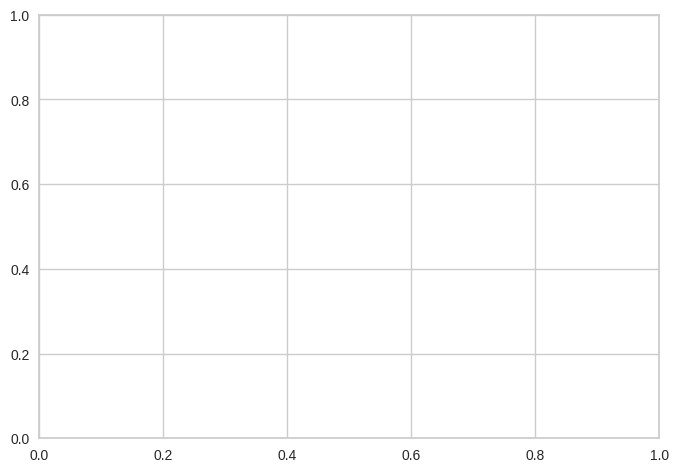

In [ ]:
# Evaluate the blended model
evaluate_model(blended_model)

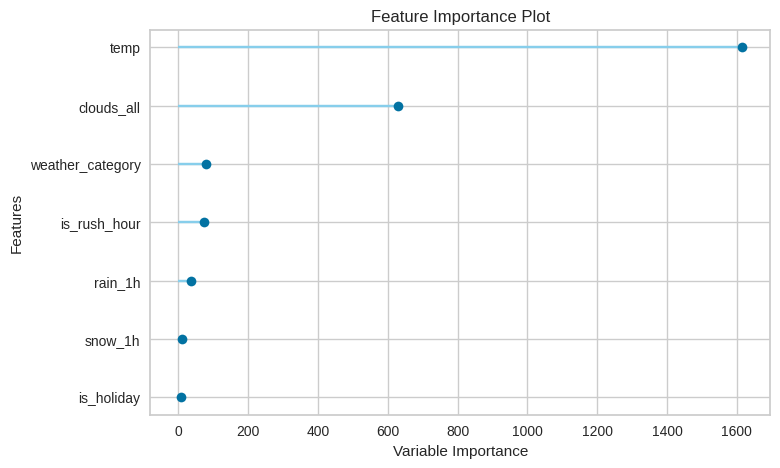

In [ ]:
# Plot feature importance of lightgbm
plot_model(tuned_lightgbm, plot='feature')

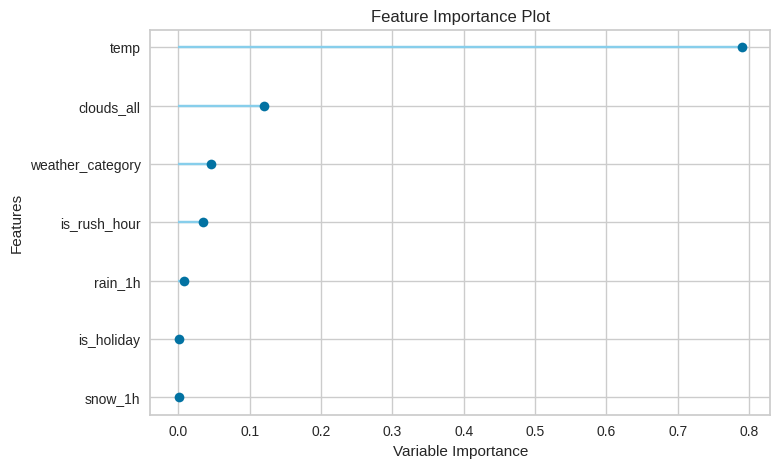

In [ ]:
# Plot feature importance of rf
plot_model(rf, plot='feature')

# Making predictions

In [ ]:
# Finalize the model and predict on the unseen data
final_model = finalize_model(blended_model) # Retrains on entire training data
predictions= predict_model(final_model, data=data_unseen)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,868.1478,1122542.6347,1059.5011,0.4794,0.3344,0.2916


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


In [ ]:
# Display the first few rows of the data containing predictions
predictions.head(10)

,is_holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,is_rush_hour,weather_category,traffic_volume,prediction_label
0,0,293.100006,0,0,20,Clouds,1,Normal,4770,4549.461774
1,0,280.529999,0,0,90,Clouds,0,Normal,5870,4701.800775
2,0,281.420013,0,0,90,Clouds,1,Normal,6169,5291.038742
3,0,280.000000,0,0,75,Clouds,0,Normal,5153,4977.160005
4,0,269.609985,0,0,20,Clouds,0,Normal,5563,4592.089973
5,0,284.230011,0,0,40,Clouds,1,Normal,4259,4398.473771
6,0,278.380005,0,0,90,Clouds,1,Normal,5765,4914.346886
7,0,279.350006,0,0,90,Clouds,1,Normal,5599,4802.386350
8,0,279.609985,0,0,99,Rain,1,Precipitation,5680,6044.288773
9,0,272.660004,0,0,1,Clear,0,Normal,5809,4259.572278


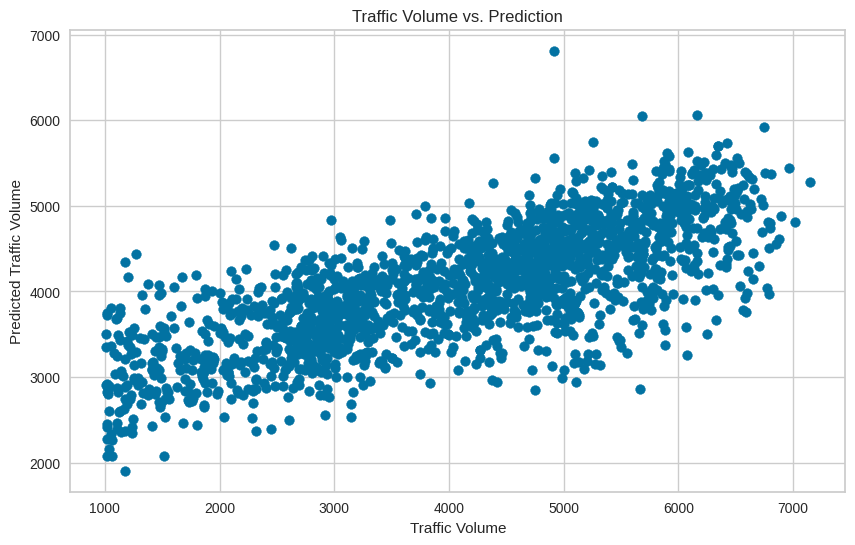

In [ ]:
# Plot actual traffic volume vs predicted traffic volume

plt.figure(figsize=(10, 6))
plt.scatter(predictions['traffic_volume'], predictions['prediction_label'])
plt.xlabel('Traffic Volume')
plt.ylabel('Predicted Traffic Volume')
plt.title('Traffic Volume vs. Prediction')
plt.show()
